<a href="https://colab.research.google.com/github/Haz-mor/Haz-projects/blob/main/Sprint_10_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 Objetivo del ejercicio:
Aplicar los contenidos vistos sobre estandarización, transformación y métricas.

## 📝 Descripción del problema:
Dentro de la empresa Alfa Bank necesitamos predecir si un cliente dejará el banco pronto.Tenemos los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

*   RowNumber: índice de cadena de datos
*   CustomerId: identificador de cliente único
*   Surname: apellido
*   CreditScore: valor de crédito
*   Geography: país de residencia
*   Gender: sexo
*   Age: edad
*   Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
*   Balance: saldo de la cuenta
*   NumOfProducts: número de productos bancarios utilizados por el cliente
*   HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
*   IsActiveMember: actividad del cliente (1 - sí; 0 - no)
*   EstimatedSalary: salario estimado

In [28]:
import pandas as pd

# Cargar el CSV
df = pd.read_csv("Churn.csv")

# Mostrar las primeras filas y columnas disponibles
df.dropna(inplace=True)
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Antes de empezar!!... Hay columnas que podemos eliminar ? que no aporten valor al modelo ?

In [29]:
### R:
col_to_del = ["RowNumber","CustomerId","Surname"]
df.drop(columns=col_to_del,inplace = True)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


## Codificación de Variables Categóricas

### One-Hot Encoding: Para Variables Nominales!

#### Usando pandas : get_dummies()

In [30]:
#Seleccionar columnas nominales :
col_to_transform = ["Geography","Gender"]
# Aplicamos onehotencoding de pandas:
df_transf = pd.get_dummies(df[col_to_transform], dtype=int, drop_first=True)

In [22]:
# Mostramos la información
df_transf

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
9994,0,0,0
9995,0,0,1
9996,0,0,1
9997,0,0,0


In [23]:
# Juntamos los dataframes
df_final = pd.concat([df,df_transf],axis=1)

In [24]:
# Eliminamos las columnas transformadas
df_final.drop(columns=col_to_transform,inplace=True)

In [31]:
# Mostramos el resultado:
df_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


### Hay Variables Ordinales?

In [26]:
## Respuesta:NO

## Estandarización de Variables Numéricas


### Escalado Estandar: StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler

# Escalado de todas las variables (después de codificar) sin incluir la variable a predecir!
scaler_std = StandardScaler()

# Capturamos todas las columnas:
cols = list(df_final.columns)
cols.remove('Exited')
X_scaled = scaler_std.fit_transform(df_final[cols])
# Para inspeccionar el resultado
X_scaled_std_df = pd.DataFrame(X_scaled, columns=cols)

In [ ]:
X_scaled_std_df

### Minmax Scaler:

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()
X_scaled_mm = scaler_mm.fit_transform(df_final[cols])

# Para inspeccionar el resultado
X_scaled_mm_df = pd.DataFrame(X_scaled_mm, columns=cols)

In [34]:
X_scaled_mm_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9086,0.900,0.148649,0.2,0.000000,0.333333,0.0,0.0,0.838890,0.0,0.0,0.0
9087,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,0.0,1.0
9088,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,0.0,1.0
9089,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,0.0,0.0,0.0


## División de datos y Entrenamiento Básico

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X_scaled_std_df, y, test_size=0.3, random_state=42, stratify=y)


## Métricas de Clasificación

Reporte de métricas:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2172
           1       0.56      0.19      0.28       556

    accuracy                           0.80      2728
   macro avg       0.69      0.57      0.58      2728
weighted avg       0.77      0.80      0.76      2728



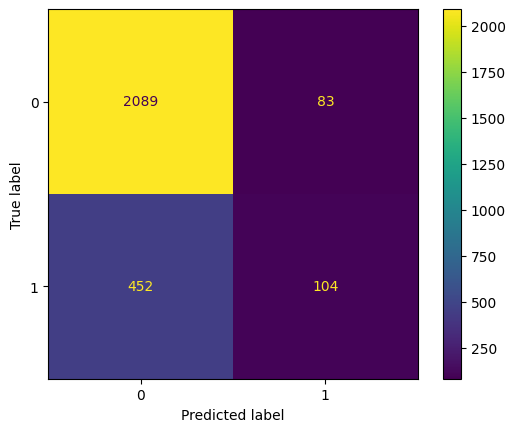

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
## Modelo simple:
model = LogisticRegression()
model.fit(X_train, y_train)

#Entrenamos:
y_pred = model.predict(X_test)

print("Reporte de métricas:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Curva ROC y AUC

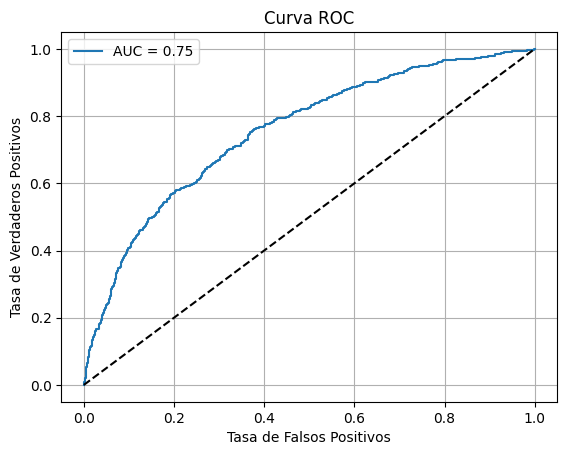

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()


## Manejo de Desbalanceo con class_weight

Reporte con pesos balanceados:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      2172
           1       0.38      0.66      0.48       556

    accuracy                           0.71      2728
   macro avg       0.63      0.69      0.64      2728
weighted avg       0.79      0.71      0.73      2728



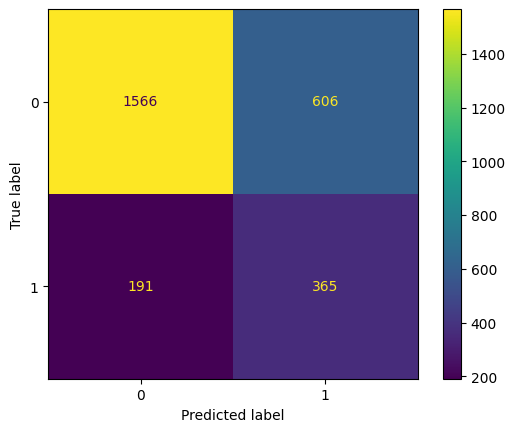

In [38]:
# Modelo simple balanceado:
model_balanced = LogisticRegression(class_weight='balanced')
#Entrenamos:
model_balanced.fit(X_train, y_train)
print("Reporte con pesos balanceados:")
y_pred_new = model_balanced.predict(X_test)
print(classification_report(y_test, model_balanced.predict(X_test)))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_new)

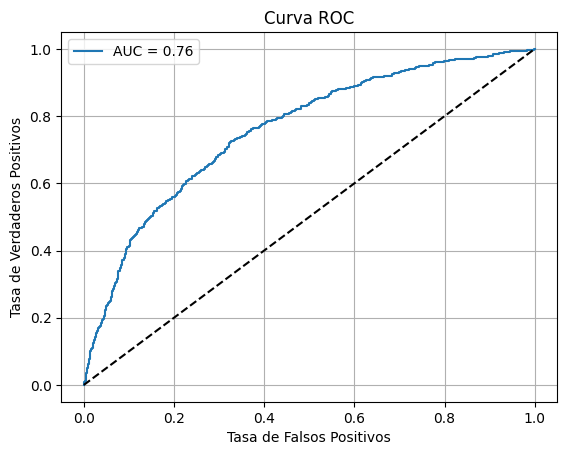

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_proba = model_balanced.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()